In [ ]:
import pandas as pd
# Set the file path from Google Drive
file_path = '/content/Copy of ECON329 Experiment (Responses).xlsx'
data = pd.read_excel(file_path)
print(data.columns.tolist())

['Timestamp', 'Email', 'Player', 'Partner', 'Front or Back of Room?', 'Round 1: Your Move', 'Round 1: Your Payoff', 'Round 2: Your Move', 'Round 2: Your Payoff', 'Round 3: Your Move', 'Round 3: Your Payoff', 'Round 4: Your Move', 'Round 4: Your Payoff', 'Round 5: Your Move', 'Round 5: Your Payoff', 'Round 1: Your Move.1', 'Round 1: Your Payoff.1', 'Round 2: Your Move.1', 'Round 2: Your Payoff.1', 'Round 3: Your Move.1', 'Round 3: Your Payoff.1', 'Round 4: Your Move.1', 'Round 4: Your Payoff.1', 'Round 5: Your Move.1', 'Round 5: Your Payoff.1', 'Round 1: Your Move.2', 'Round 1: Your Payoff.2', 'Round 2: Your Move.2', 'Round 2: Your Payoff.2', 'Round 3: Your Move.2', 'Round 3: Your Payoff.2', 'Round 4: Your Move.2', 'Round 4: Your Payoff.2', 'Round 5: Your Move.2', 'Round 5: Your Payoff.2', "Group Members' Names", 'Round 1: Your Move.3', 'Round 1: Your Total Points', 'Round 2: Your Move.3', 'Round 2: Your Total Points', 'Round 3: Your Move.3', 'Round 3: Your Total Points', 'Round 4: Your

In [ ]:
import pandas as pd

# Load your data
file_path = '/content/Copy of ECON329 Experiment (Responses).xlsx'
data = pd.read_excel(file_path)

# Define games, rounds, and room sections for renaming
games = ["G1", "G2", "G3", "G4"]  # For the 4 games
rounds = ["R1", "R2", "R3", "R4", "R5"]  # For 5 rounds in each game
sections = ["Front", "Back"]  # For Front and Back sections

# Get current column names to update
columns = data.columns.tolist()

# Prepare new column names
new_columns = []
game_index = 0
round_index = 0
section_index = 0

# Rename columns sequentially
for col in columns:
    if "Your Move" in col:
        # Rename "Your Move" columns with game, round, and section
        new_columns.append(f"{sections[section_index]} {games[game_index]} {rounds[round_index]} Move")
        round_index += 1

        # After 5 rounds, reset round index and move to the next game
        if round_index == len(rounds):
            round_index = 0
            game_index += 1

        # After all games for a section, reset game index and move to the next section
        if game_index == len(games):
            game_index = 0
            section_index = (section_index + 1) % len(sections)

    elif "Your Payoff" in col:
        # Rename "Your Payoff" columns with game, round, and section
        new_columns.append(f"{sections[section_index]} {games[game_index]} {rounds[round_index-1]} Payoff")  # Use last round index
    else:
        # Keep non-game-related columns unchanged
        new_columns.append(col)

# Check for duplicates by converting the list to a set and comparing lengths
if len(new_columns) != len(set(new_columns)):
    print("Warning: Duplicates detected in column names.")
else:
    print("No duplicates in column names.")

# Apply new column names
data.columns = new_columns

# Show the renamed columns to verify
print(data.columns.tolist())


No duplicates in column names.
['Timestamp', 'Email', 'Player', 'Partner', 'Front or Back of Room?', 'Front G1 R1 Move', 'Front G1 R1 Payoff', 'Front G1 R2 Move', 'Front G1 R2 Payoff', 'Front G1 R3 Move', 'Front G1 R3 Payoff', 'Front G1 R4 Move', 'Front G1 R4 Payoff', 'Front G1 R5 Move', 'Front G2 R5 Payoff', 'Front G2 R1 Move', 'Front G2 R1 Payoff', 'Front G2 R2 Move', 'Front G2 R2 Payoff', 'Front G2 R3 Move', 'Front G2 R3 Payoff', 'Front G2 R4 Move', 'Front G2 R4 Payoff', 'Front G2 R5 Move', 'Front G3 R5 Payoff', 'Front G3 R1 Move', 'Front G3 R1 Payoff', 'Front G3 R2 Move', 'Front G3 R2 Payoff', 'Front G3 R3 Move', 'Front G3 R3 Payoff', 'Front G3 R4 Move', 'Front G3 R4 Payoff', 'Front G3 R5 Move', 'Front G4 R5 Payoff', "Group Members' Names", 'Front G4 R1 Move', 'Round 1: Your Total Points', 'Front G4 R2 Move', 'Round 2: Your Total Points', 'Front G4 R3 Move', 'Round 3: Your Total Points', 'Front G4 R4 Move', 'Round 4: Your Total Points', 'Front G4 R5 Move', 'Round 5: Your Total Poin

In [ ]:
# Iterate over columns and rename based on context (Front or Back section)
new_column_names = []
for col in data.columns:
    if "Round" in col and "Your Total Points" in col:
        # Determine if it's Front or Back based on previous column labels
        if "Front" in new_column_names[-1]:
            new_column_names.append(f"Front {col}")
        elif "Back" in new_column_names[-1]:
            new_column_names.append(f"Back {col}")
        else:
            new_column_names.append(col)  # Default if context is unclear
    elif "Group Members' Names" in col:
        # Rename "Group Members' Names" columns to include Front/Back
        if "Front" in new_column_names[-1]:
            new_column_names.append("Front Group Members' Names")
        elif "Back" in new_column_names[-1]:
            new_column_names.append("Back Group Members' Names")
        else:
            new_column_names.append(col)  # Default if context is unclear
    else:
        new_column_names.append(col)

# Apply the new column names to the DataFrame
data.columns = new_column_names

# Print the final column names to verify
print(data.columns.tolist())


['Timestamp', 'Email', 'Player', 'Partner', 'Front or Back of Room?', 'Front G1 R1 Move', 'Front G1 R1 Payoff', 'Front G1 R2 Move', 'Front G1 R2 Payoff', 'Front G1 R3 Move', 'Front G1 R3 Payoff', 'Front G1 R4 Move', 'Front G1 R4 Payoff', 'Front G1 R5 Move', 'Front G2 R5 Payoff', 'Front G2 R1 Move', 'Front G2 R1 Payoff', 'Front G2 R2 Move', 'Front G2 R2 Payoff', 'Front G2 R3 Move', 'Front G2 R3 Payoff', 'Front G2 R4 Move', 'Front G2 R4 Payoff', 'Front G2 R5 Move', 'Front G3 R5 Payoff', 'Front G3 R1 Move', 'Front G3 R1 Payoff', 'Front G3 R2 Move', 'Front G3 R2 Payoff', 'Front G3 R3 Move', 'Front G3 R3 Payoff', 'Front G3 R4 Move', 'Front G3 R4 Payoff', 'Front G3 R5 Move', 'Front G4 R5 Payoff', "Front Group Members' Names", 'Front G4 R1 Move', 'Front Round 1: Your Total Points', 'Front G4 R2 Move', 'Front Round 2: Your Total Points', 'Front G4 R3 Move', 'Front Round 3: Your Total Points', 'Front G4 R4 Move', 'Front Round 4: Your Total Points', 'Front G4 R5 Move', 'Front Round 5: Your Total

In [ ]:
# Replace ".1" suffix for the "Back Round X: Your Total Points" columns
new_column_names = []
for col in data.columns:
    if col.endswith(".1") and "Back Round" in col:
        new_column_names.append(col.replace(".1", ""))  # Remove ".1" from column name
    else:
        new_column_names.append(col)

# Apply the cleaned column names
data.columns = new_column_names

# Print final column names to verify
print(data.columns.tolist())


NameError: name 'data' is not defined

In [ ]:
# Ensure you have openpyxl installed for saving as Excel
!pip install openpyxl

# Save the DataFrame to an Excel file
data.to_excel('updated_data.xlsx', index=False)


In [ ]:
import matplotlib.pyplot as plt

import pandas as pd
# Set the file path from Google Drive
file_path = "/content/Cleaned Data Econ 329 .xlsx"
data = pd.read_excel(file_path)

print(data.columns.tolist())



['Email', 'Player', 'Partner', 'Front or Back of Room?', 'Front G1 R1 Move', 'Front G1 R1 Payoff', 'Front G1 R2 Move', 'Front G1 R2 Payoff', 'Front G1 R3 Move', 'Front G1 R3 Payoff', 'Front G1 R4 Move', 'Front G1 R4 Payoff', 'Front G1 R5 Move', 'Front G1 R5 Payoff', 'Front G2 R1 Move', 'Front G2 R1 Payoff', 'Front G2 R2 Move', 'Front G2 R2 Payoff', 'Front G2 R3 Move', 'Front G2 R3 Payoff', 'Front G2 R4 Move', 'Front G2 R4 Payoff', 'Front G2 R5 Move', 'Front G2 R5 Payoff', 'Front G3 R1 Move', 'Front G3 R1 Payoff', 'Front G3 R2 Move', 'Front G3 R2 Payoff', 'Front G3 R3 Move', 'Front G3 R3 Payoff', 'Front G3 R4 Move', 'Front G3 R4 Payoff', 'Front G3 R5 Move', 'Front G3 R5 Payoff', "Front Group Members' Names", 'Front G4 R1 Move', 'Front Round 1: Your Total Points', 'Front G4 R2 Move', 'Front Round 2: Your Total Points', 'Front G4 R3 Move', 'Front Round 3: Your Total Points', 'Front G4 R4 Move', 'Front Round 4: Your Total Points', 'Front G4 R5 Move', 'Front Round 5: Your Total Points', 'Ba

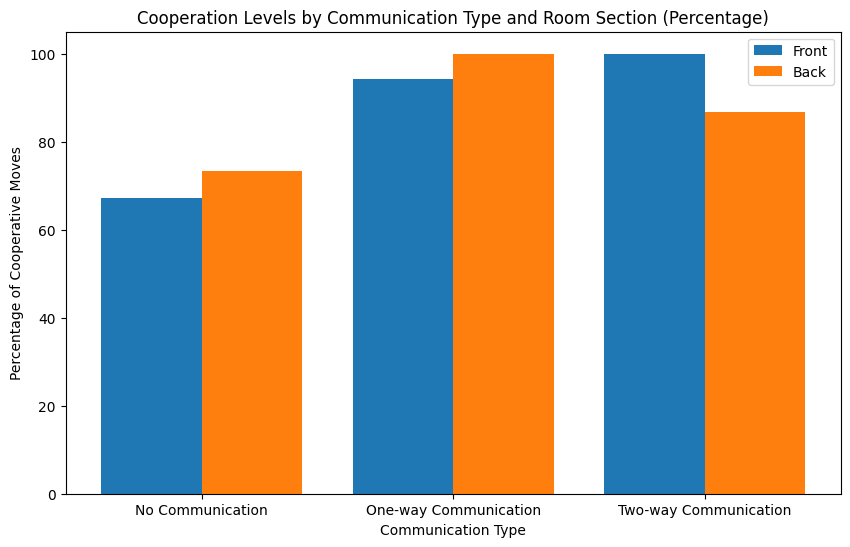

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define columns for each game type and section (Front, Back)
communication_types = {
    'No Communication': {
        'Front': ['Front G1 R1 Payoff', 'Front G1 R2 Payoff', 'Front G1 R3 Payoff', 'Front G1 R4 Payoff', 'Front G1 R5 Payoff'],
        'Back': ['Back G1 R1 Payoff', 'Back G1 R2 Payoff', 'Back G1 R3 Payoff', 'Back G1 R4 Payoff', 'Back G1 R5 Payoff']
    },
    'One-way Communication': {
        'Front': ['Front G2 R1 Payoff', 'Front G2 R2 Payoff', 'Front G2 R3 Payoff', 'Front G2 R4 Payoff', 'Front G2 R5 Payoff'],
        'Back': ['Back G2 R1 Payoff', 'Back G2 R2 Payoff', 'Back G2 R3 Payoff', 'Back G2 R4 Payoff', 'Back G2 R5 Payoff']
    },
    'Two-way Communication': {
        'Front': ['Front G3 R1 Payoff', 'Front G3 R2 Payoff', 'Front G3 R3 Payoff', 'Front G3 R4 Payoff', 'Front G3 R5 Payoff'],
        'Back': ['Back G3 R1 Payoff', 'Back G3 R2 Payoff', 'Back G3 R3 Payoff', 'Back G3 R4 Payoff', 'Back G3 R5 Payoff']
    }
}

# Prepare data for plotting
front_percentages = []
back_percentages = []

for comm_type, sections in communication_types.items():
    # Calculate cooperative moves (where payoff > 0)
    front_cooperate = data[sections['Front']].apply(lambda x: x > 0).sum().sum()
    back_cooperate = data[sections['Back']].apply(lambda x: x > 0).sum().sum()

    # Calculate total moves (5 rounds per game)
    total_front_moves = data[sections['Front']].notna().sum().sum()
    total_back_moves = data[sections['Back']].notna().sum().sum()

    # Calculate percentages
    front_percentages.append((front_cooperate / total_front_moves) * 100)
    back_percentages.append((back_cooperate / total_back_moves) * 100)

# Plotting the double histogram
x_labels = list(communication_types.keys())
x = range(len(x_labels))

plt.figure(figsize=(10, 6))
plt.bar(x, front_percentages, width=0.4, label='Front', align='center')
plt.bar([i + 0.4 for i in x], back_percentages, width=0.4, label='Back', align='center')

plt.xlabel('Communication Type')
plt.ylabel('Percentage of Cooperative Moves')
plt.title('Cooperation Levels by Communication Type and Room Section (Percentage)')
plt.xticks([i + 0.2 for i in x], x_labels)
plt.legend()
plt.show()


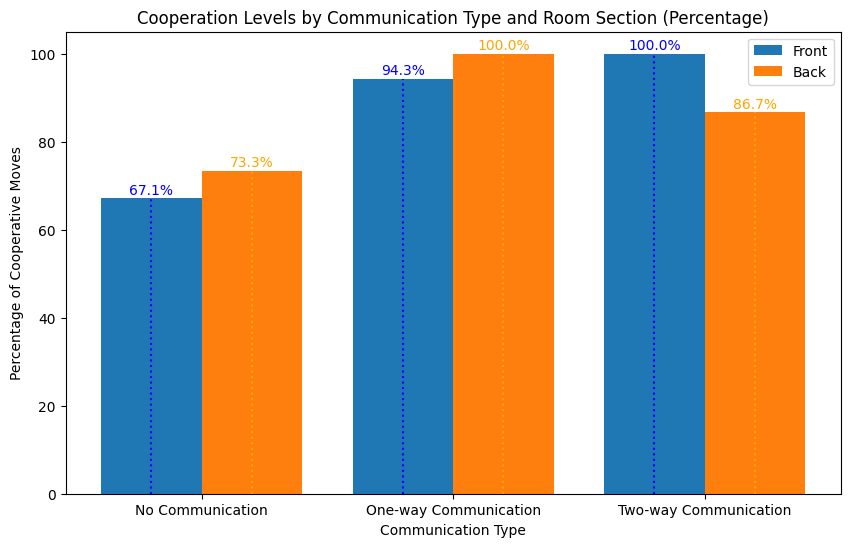

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Define columns for each game type and section (Front, Back)
communication_types = {
    'No Communication': {
        'Front': ['Front G1 R1 Payoff', 'Front G1 R2 Payoff', 'Front G1 R3 Payoff', 'Front G1 R4 Payoff', 'Front G1 R5 Payoff'],
        'Back': ['Back G1 R1 Payoff', 'Back G1 R2 Payoff', 'Back G1 R3 Payoff', 'Back G1 R4 Payoff', 'Back G1 R5 Payoff']
    },
    'One-way Communication': {
        'Front': ['Front G2 R1 Payoff', 'Front G2 R2 Payoff', 'Front G2 R3 Payoff', 'Front G2 R4 Payoff', 'Front G2 R5 Payoff'],
        'Back': ['Back G2 R1 Payoff', 'Back G2 R2 Payoff', 'Back G2 R3 Payoff', 'Back G2 R4 Payoff', 'Back G2 R5 Payoff']
    },
    'Two-way Communication': {
        'Front': ['Front G3 R1 Payoff', 'Front G3 R2 Payoff', 'Front G3 R3 Payoff', 'Front G3 R4 Payoff', 'Front G3 R5 Payoff'],
        'Back': ['Back G3 R1 Payoff', 'Back G3 R2 Payoff', 'Back G3 R3 Payoff', 'Back G3 R4 Payoff', 'Back G3 R5 Payoff']
    }
}

# Prepare data for plotting
front_percentages = []
back_percentages = []

for comm_type, sections in communication_types.items():
    # Calculate cooperative moves (where payoff > 0)
    front_cooperate = data[sections['Front']].apply(lambda x: x > 0).sum().sum()
    back_cooperate = data[sections['Back']].apply(lambda x: x > 0).sum().sum()

    # Calculate total moves (5 rounds per game)
    total_front_moves = data[sections['Front']].notna().sum().sum()
    total_back_moves = data[sections['Back']].notna().sum().sum()

    # Calculate percentages
    front_percentages.append((front_cooperate / total_front_moves) * 100)
    back_percentages.append((back_cooperate / total_back_moves) * 100)

# Plotting the double histogram
x_labels = list(communication_types.keys())
x = range(len(x_labels))

plt.figure(figsize=(10, 6))
bar1 = plt.bar(x, front_percentages, width=0.4, label='Front', align='center')
bar2 = plt.bar([i + 0.4 for i in x], back_percentages, width=0.4, label='Back', align='center')

# Add vertical lines from each bar top to the x-axis and annotate the percentage
for i, percentage in enumerate(front_percentages):
    plt.vlines(x=i, ymin=0, ymax=percentage, colors='blue', linestyles='dotted')
    plt.text(i, percentage + 1, f'{percentage:.1f}%', ha='center', color='blue')

for i, percentage in enumerate(back_percentages):
    plt.vlines(x=i + 0.4, ymin=0, ymax=percentage, colors='orange', linestyles='dotted')
    plt.text(i + 0.4, percentage + 1, f'{percentage:.1f}%', ha='center', color='orange')

plt.xlabel('Communication Type')
plt.ylabel('Percentage of Cooperative Moves')
plt.title('Cooperation Levels by Communication Type and Room Section (Percentage)')
plt.xticks([i + 0.2 for i in x], x_labels)
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import scipy.stats as stats

# Assuming `data` is your DataFrame and `communication_types` contains column names for each type.

# Combine cooperation data for each communication type across Front and Back sections
no_comm_cooperate = data[communication_types['No Communication']['Front'] + communication_types['No Communication']['Back']].apply(lambda x: x > 0).sum().sum()
one_way_cooperate = data[communication_types['One-way Communication']['Front'] + communication_types['One-way Communication']['Back']].apply(lambda x: x > 0).sum().sum()
two_way_cooperate = data[communication_types['Two-way Communication']['Front'] + communication_types['Two-way Communication']['Back']].apply(lambda x: x > 0).sum().sum()

# Total rounds per game type for the whole class
total_no_comm = data[communication_types['No Communication']['Front'] + communication_types['No Communication']['Back']].notna().sum().sum()
total_one_way = data[communication_types['One-way Communication']['Front'] + communication_types['One-way Communication']['Back']].notna().sum().sum()
total_two_way = data[communication_types['Two-way Communication']['Front'] + communication_types['Two-way Communication']['Back']].notna().sum().sum()

# Calculate cooperation rates for the whole class
no_comm_rate = no_comm_cooperate / total_no_comm
one_way_rate = one_way_cooperate / total_one_way
two_way_rate = two_way_cooperate / total_two_way

# Perform t-tests between each communication type
t_stat_one_vs_no, p_value_one_vs_no = stats.ttest_ind(
    data[communication_types['One-way Communication']['Front'] + communication_types['One-way Communication']['Back']].apply(lambda x: x > 0).values.flatten(),
    data[communication_types['No Communication']['Front'] + communication_types['No Communication']['Back']].apply(lambda x: x > 0).values.flatten(),
    nan_policy='omit'
)

t_stat_two_vs_no, p_value_two_vs_no = stats.ttest_ind(
    data[communication_types['Two-way Communication']['Front'] + communication_types['Two-way Communication']['Back']].apply(lambda x: x > 0).values.flatten(),
    data[communication_types['No Communication']['Front'] + communication_types['No Communication']['Back']].apply(lambda x: x > 0).values.flatten(),
    nan_policy='omit'
)

t_stat_two_vs_one, p_value_two_vs_one = stats.ttest_ind(
    data[communication_types['Two-way Communication']['Front'] + communication_types['Two-way Communication']['Back']].apply(lambda x: x > 0).values.flatten(),
    data[communication_types['One-way Communication']['Front'] + communication_types['One-way Communication']['Back']].apply(lambda x: x > 0).values.flatten(),
    nan_policy='omit'
)

# Print the results
print("Difference between each communication type (Combined Front and Back):")
print(f"One-way vs No Communication - T-test Statistic: {t_stat_one_vs_no:.2f}, p-value: {p_value_one_vs_no:.4f}")
print(f"Two-way vs No Communication - T-test Statistic: {t_stat_two_vs_no:.2f}, p-value: {p_value_two_vs_no:.4f}")
print(f"Two-way vs One-way - T-test Statistic: {t_stat_two_vs_one:.2f}, p-value: {p_value_two_vs_one:.4f}")


Difference between each communication type (Combined Front and Back):
One-way vs No Communication - T-test Statistic: 3.14, p-value: 0.0018
Two-way vs No Communication - T-test Statistic: 2.78, p-value: 0.0056
Two-way vs One-way - T-test Statistic: -0.35, p-value: 0.7261


In [ ]:
import pandas as pd
import scipy.stats as stats
import numpy as np

# Combine cooperation data for each communication type across Front and Back sections
no_comm_cooperate = data[communication_types['No Communication']['Front'] + communication_types['No Communication']['Back']].apply(lambda x: x > 0).sum().sum()
one_way_cooperate = data[communication_types['One-way Communication']['Front'] + communication_types['One-way Communication']['Back']].apply(lambda x: x > 0).sum().sum()
two_way_cooperate = data[communication_types['Two-way Communication']['Front'] + communication_types['Two-way Communication']['Back']].apply(lambda x: x > 0).sum().sum()

# Total rounds per game type for the whole class
total_no_comm = data[communication_types['No Communication']['Front'] + communication_types['No Communication']['Back']].notna().sum().sum()
total_one_way = data[communication_types['One-way Communication']['Front'] + communication_types['One-way Communication']['Back']].notna().sum().sum()
total_two_way = data[communication_types['Two-way Communication']['Front'] + communication_types['Two-way Communication']['Back']].notna().sum().sum()

# Calculate cooperation rates and standard errors for the whole class
no_comm_rate = no_comm_cooperate / total_no_comm
one_way_rate = one_way_cooperate / total_one_way
two_way_rate = two_way_cooperate / total_two_way

# Standard errors for confidence intervals
no_comm_se = np.sqrt((no_comm_rate * (1 - no_comm_rate)) / total_no_comm)
one_way_se = np.sqrt((one_way_rate * (1 - one_way_rate)) / total_one_way)
two_way_se = np.sqrt((two_way_rate * (1 - two_way_rate)) / total_two_way)

# Calculate 95% confidence intervals
confidence_level = 0.95
z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)

no_comm_ci = (no_comm_rate - z_score * no_comm_se, no_comm_rate + z_score * no_comm_se)
one_way_ci = (one_way_rate - z_score * one_way_se, one_way_rate + z_score * one_way_se)
two_way_ci = (two_way_rate - z_score * two_way_se, two_way_rate + z_score * two_way_se)

# Perform t-tests between each communication type
t_stat_one_vs_no, p_value_one_vs_no = stats.ttest_ind(
    data[communication_types['One-way Communication']['Front'] + communication_types['One-way Communication']['Back']].apply(lambda x: x > 0).values.flatten(),
    data[communication_types['No Communication']['Front'] + communication_types['No Communication']['Back']].apply(lambda x: x > 0).values.flatten(),
    nan_policy='omit'
)

t_stat_two_vs_no, p_value_two_vs_no = stats.ttest_ind(
    data[communication_types['Two-way Communication']['Front'] + communication_types['Two-way Communication']['Back']].apply(lambda x: x > 0).values.flatten(),
    data[communication_types['No Communication']['Front'] + communication_types['No Communication']['Back']].apply(lambda x: x > 0).values.flatten(),
    nan_policy='omit'
)

t_stat_two_vs_one, p_value_two_vs_one = stats.ttest_ind(
    data[communication_types['Two-way Communication']['Front'] + communication_types['Two-way Communication']['Back']].apply(lambda x: x > 0).values.flatten(),
    data[communication_types['One-way Communication']['Front'] + communication_types['One-way Communication']['Back']].apply(lambda x: x > 0).values.flatten(),
    nan_policy='omit'
)

# Print the results with confidence intervals
print("Difference between each communication type (Combined Front and Back) with Confidence Intervals:")
print(f"No Communication - Rate: {no_comm_rate:.2f}, 95% CI: {no_comm_ci}")
print(f"One-way Communication - Rate: {one_way_rate:.2f}, 95% CI: {one_way_ci}")
print(f"Two-way Communication - Rate: {two_way_rate:.2f}, 95% CI: {two_way_ci}")
print("\nT-tests between communication types:")
print(f"One-way vs No Communication - T-test Statistic: {t_stat_one_vs_no:.2f}, p-value: {p_value_one_vs_no:.4f}")
print(f"Two-way vs No Communication - T-test Statistic: {t_stat_two_vs_no:.2f}, p-value: {p_value_two_vs_no:.4f}")
print(f"Two-way vs One-way - T-test Statistic: {t_stat_two_vs_one:.2f}, p-value: {p_value_two_vs_one:.4f}")


Difference between each communication type (Combined Front and Back) with Confidence Intervals:
No Communication - Rate: 0.70, 95% CI: (0.6212254261859651, 0.7787745738140348)
One-way Communication - Rate: 0.97, 95% CI: (0.9395449983769855, 0.998916540084553)
Two-way Communication - Rate: 0.94, 95% CI: (0.8971512743685259, 0.979771802554551)

T-tests between communication types:
One-way vs No Communication - T-test Statistic: 3.14, p-value: 0.0018
Two-way vs No Communication - T-test Statistic: 2.78, p-value: 0.0056
Two-way vs One-way - T-test Statistic: -0.35, p-value: 0.7261


In [ ]:
import pandas as pd
import scipy.stats as stats

# Calculate cooperation rates for each round in both sections (Front and Back) based on communication order

# Cooperation rates for Front section (One-way first then Two-way)
front_one_way_first = data[communication_types['One-way Communication']['Front']].apply(lambda x: x > 0).mean(axis=0)
front_two_way_second = data[communication_types['Two-way Communication']['Front']].apply(lambda x: x > 0).mean(axis=0)

# Cooperation rates for Back section (Two-way first then One-way)
back_two_way_first = data[communication_types['Two-way Communication']['Back']].apply(lambda x: x > 0).mean(axis=0)
back_one_way_second = data[communication_types['One-way Communication']['Back']].apply(lambda x: x > 0).mean(axis=0)

# Debug: Print intermediate cooperation rates for each section and communication order
print("Front - One-way first cooperation rates:", front_one_way_first)
print("Front - Two-way second cooperation rates:", front_two_way_second)
print("Back - Two-way first cooperation rates:", back_two_way_first)
print("Back - One-way second cooperation rates:", back_one_way_second)

# Calculate the difference in cooperation rates per round for Front and Back
front_diff = front_two_way_second.values - front_one_way_first.values
back_diff = back_one_way_second.values - back_two_way_first.values

# Debug: Print calculated differences in cooperation rates
print("Difference in cooperation rates per round for Front (Two-way second - One-way first):", front_diff)
print("Difference in cooperation rates per round for Back (One-way second - Two-way first):", back_diff)

# Perform a t-test on the differences between Front and Back cooperation rate differences
t_stat, p_value = stats.ttest_ind(front_diff, back_diff, nan_policy='omit')

# Print the results
print("Effect of Communication Order:")
print(f"Mean difference in cooperation rates for Front (Two-way second - One-way first): {front_diff.mean()}")
print(f"Mean difference in cooperation rates for Back (One-way second - Two-way first): {back_diff.mean()}")
print(f"T-test Statistic: {t_stat}, p-value: {p_value}")


Front - One-way first cooperation rates: Front G2 R1 Payoff    0.461538
Front G2 R2 Payoff    0.538462
Front G2 R3 Payoff    0.538462
Front G2 R4 Payoff    0.538462
Front G2 R5 Payoff    0.461538
dtype: float64
Front - Two-way second cooperation rates: Front G3 R1 Payoff    0.538462
Front G3 R2 Payoff    0.538462
Front G3 R3 Payoff    0.538462
Front G3 R4 Payoff    0.538462
Front G3 R5 Payoff    0.538462
dtype: float64
Back - Two-way first cooperation rates: Back G3 R1 Payoff    0.461538
Back G3 R2 Payoff    0.384615
Back G3 R3 Payoff    0.384615
Back G3 R4 Payoff    0.384615
Back G3 R5 Payoff    0.384615
dtype: float64
Back - One-way second cooperation rates: Back G2 R1 Payoff    0.461538
Back G2 R2 Payoff    0.461538
Back G2 R3 Payoff    0.461538
Back G2 R4 Payoff    0.461538
Back G2 R5 Payoff    0.461538
dtype: float64
Difference in cooperation rates per round for Front (Two-way second - One-way first): [0.07692308 0.         0.         0.         0.07692308]
Difference in cooperati

In [ ]:
# What we did above
#I calculated cooperation rates per round for each communication order
# in the Front and Back sections, then compared the differences in cooperation
# rates for "One-way first, then Two-way" versus "Two-way first, then One-way."
# Using these round-by-round differences, I performed a t-test to see if
#the order of communication significantly impacted cooperation rates.


#In short, the analysis shows that in the Front section
#(where One-way was played first), the difference in cooperation rates
#between Two-way second and One-way first was small (mean difference: 0.03)
#and not statistically significant. In the Back section (where Two-way was
#played first), the difference in cooperation rates between One-way second
#and Two-way first was slightly larger (mean difference: 0.06), but this
#difference was also not statistically significant, as indicated by a
#p-value of 0.24.

#The p-value of 0.24 indicates that the difference in cooperation rates
#due to communication order (Two-way first in Back vs. One-way first in Front)
# is not statistically significant at conventional levels (e.g., p < 0.05)


In [ ]:
# Select columns for G1 rounds only (No Communication rounds for Player 1)
no_comm_columns = [col for col in data.columns if 'G1' in col and 'Move' in col]

# Filter only the rows where 'Player' is 'Player 1'
player_1_data = data[data['Player'] == 'Player 1']

# Convert values to strings, standardize to lowercase, and count "up" moves
up_count = player_1_data[no_comm_columns].apply(lambda x: x.astype(str).str.strip().str.lower() == 'up').sum().sum()

# Calculate the total number of no communication rounds Player 1 participated in
total_moves = player_1_data[no_comm_columns].notna().sum().sum()

# Calculate the percentage of "up" moves
up_percentage = (up_count / total_moves) * 100 if total_moves > 0 else 0

# Print the result
print(f"Percentage of 'up' moves by Player 1 in no communication (G1) games: {up_percentage:.2f}%")


Percentage of 'up' moves by Player 1 in no communication (G1) games: 63.08%


In [ ]:
import numpy as np
import scipy.stats as stats

# Given values
observed_proportion = up_percentage / 100  # Convert to proportion (63.08% -> 0.6308)
expected_proportion = 0.60  # Theoretical expectation
n = total_moves  # Total number of no communication moves by Player 1

# Calculate the standard error
standard_error = np.sqrt((expected_proportion * (1 - expected_proportion)) / n)

# Calculate the z-score
z_score = (observed_proportion - expected_proportion) / standard_error

# Calculate the p-value for a two-tailed test
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

# Print the results
print(f"Observed Proportion: {observed_proportion:.4f}")
print(f"Expected Proportion: {expected_proportion:.4f}")
print(f"Z-score: {z_score:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("The difference is statistically significant at the 5% level.")
else:
    print("The difference is not statistically significant at the 5% level.")


Observed Proportion: 0.6308
Expected Proportion: 0.6000
Z-score: 0.51
P-value: 0.6126
The difference is not statistically significant at the 5% level.


In [ ]:
#In practical terms, since the p-value is well above the 0.05 threshold
#for significance, we fail to reject the null hypothesis. This suggests
#that the observed cooperation rate of 63.08% does not provide strong
#enough evidence to conclude it is different from the expected 60% rate,
#according to the theory.

In [ ]:
import pandas as pd
import scipy.stats as stats

# Define the correct columns for points in Game 4
points_columns_front = ['Front Round 1: Your Total Points', 'Front Round 2: Your Total Points',
                        'Front Round 3: Your Total Points', 'Front Round 4: Your Total Points',
                        'Front Round 5: Your Total Points']
points_columns_back = ['Back Round 1: Your Total Points', 'Back Round 2: Your Total Points',
                       'Back Round 3: Your Total Points', 'Back Round 4: Your Total Points',
                       'Back Round 5: Your Total Points']

# Calculate total points for each player in Game 4, Front and Back
data['Total_Points_Front'] = data[points_columns_front].sum(axis=1)
data['Total_Points_Back'] = data[points_columns_back].sum(axis=1)

# Perform a t-test to compare the total points between Front and Back sections
t_stat, p_value = stats.ttest_ind(data['Total_Points_Front'].dropna(), data['Total_Points_Back'].dropna(), nan_policy='omit')

# Print the results
print("Game 4 Analysis - Difference in Total Points Between Front and Back Sections:")
print(f"T-test Statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("The difference in points between Front and Back sections is statistically significant.")
else:
    print("The difference in points between Front and Back sections is not statistically significant.")


Game 4 Analysis - Difference in Total Points Between Front and Back Sections:
T-test Statistic: -0.25
P-value: 0.8019
The difference in points between Front and Back sections is not statistically significant.


In [ ]:
# 3 or greater for Front G4 for
# 4 or greater for Back G4


In [ ]:
import pandas as pd

# Define columns for Game 4 total points for Front and Back sections
front_game4_payoffs = [col for col in data.columns if 'Front Round' in col and 'Your Total Points' in col]
back_game4_payoffs = [col for col in data.columns if 'Back Round' in col and 'Your Total Points' in col]

# Filter rows for Front and Back sections separately
front_game4_data = data[front_game4_payoffs]
back_game4_data = data[back_game4_payoffs]

# Calculate the number of rounds in which players achieved payoffs of 3 or more for Front and 4 or more for Back
front_nash_count = (front_game4_data >= 3).sum().sum()
back_nash_count = (back_game4_data >= 4).sum().sum()

# Calculate total rounds for each section in Game 4
total_front_rounds = front_game4_data.notna().sum().sum()
total_back_rounds = back_game4_data.notna().sum().sum()

# Calculate the percentages of rounds where Nash equilibrium conditions were met
front_nash_percentage = (front_nash_count / total_front_rounds) * 100 if total_front_rounds > 0 else 0
back_nash_percentage = (back_nash_count / total_back_rounds) * 100 if total_back_rounds > 0 else 0

# Print the results
print(f"Percentage of Nash equilibrium payoffs in Game 4 (Front): {front_nash_percentage:.2f}%")
print(f"Percentage of Nash equilibrium payoffs in Game 4 (Back): {back_nash_percentage:.2f}%")


Percentage of Nash equilibrium payoffs in Game 4 (Front): 70.00%
Percentage of Nash equilibrium payoffs in Game 4 (Back): 40.00%


In [ ]:
import numpy as np
import scipy.stats as stats
import pandas as pd

# Assume 'data' is the DataFrame containing your Game 4 data

# Columns for Game 4 payoffs in the Front and Back sections
front_payoff_columns = [col for col in data.columns if 'Front Round' in col and 'Total Points' in col]
back_payoff_columns = [col for col in data.columns if 'Back Round' in col and 'Total Points' in col]

# Calculate the percentage of Nash equilibrium payoffs
# For Front, NE is defined as a payoff of 3 or greater
# For Back, NE is defined as a payoff of 4 or greater

# Filter for NE payoffs in Front and Back sections
front_nash_count = data[front_payoff_columns].apply(lambda x: (x >= 3).all(), axis=1).sum()
back_nash_count = data[back_payoff_columns].apply(lambda x: (x >= 4).all(), axis=1).sum()

# Calculate the total number of observations in each section
n_front = data[front_payoff_columns].notna().all(axis=1).sum()
n_back = data[back_payoff_columns].notna().all(axis=1).sum()

# Calculate the observed Nash equilibrium percentages
observed_front_rate = front_nash_count / n_front if n_front > 0 else 0
observed_back_rate = back_nash_count / n_back if n_back > 0 else 0
front_nash_percentage = observed_front_rate * 100
back_nash_percentage = observed_back_rate * 100

# Expected Nash equilibrium rate
expected_rate = 0.99  # Approximate NE rate for adjustment

# Standard errors
se_front = np.sqrt(expected_rate * (1 - expected_rate) / n_front) if n_front > 0 else 0
se_back = np.sqrt(expected_rate * (1 - expected_rate) / n_back) if n_back > 0 else 0

# Calculate z-scores
z_score_front = (observed_front_rate - expected_rate) / se_front if se_front > 0 else float('inf')
z_score_back = (observed_back_rate - expected_rate) / se_back if se_back > 0 else float('inf')

# Calculate p-values for a one-tailed test
p_value_front = stats.norm.cdf(z_score_front)
p_value_back = stats.norm.cdf(z_score_back)

# Print results
print("Comparison of observed Nash equilibrium rates to adjusted 99% NE rate:")
print(f"Front Section - Observed Rate: {front_nash_percentage:.2f}%, Z-score: {z_score_front:.2f}, p-value: {p_value_front:.4f}")
print(f"Back Section - Observed Rate: {back_nash_percentage:.2f}%, Z-score: {z_score_back:.2f}, p-value: {p_value_back:.4f}")

# Interpretation
if p_value_front < 0.05:
    print("The difference in the Front section is statistically significant at the 5% level.")
else:
    print("The difference in the Front section is not statistically significant at the 5% level.")

if p_value_back < 0.05:
    print("The difference in the Back section is statistically significant at the 5% level.")
else:
    print("The difference in the Back section is not statistically significant at the 5% level.")


Comparison of observed Nash equilibrium rates to adjusted 99% NE rate:
Front Section - Observed Rate: 64.29%, Z-score: -13.05, p-value: 0.0000
Back Section - Observed Rate: 8.33%, Z-score: -31.57, p-value: 0.0000
The difference in the Front section is statistically significant at the 5% level.
The difference in the Back section is statistically significant at the 5% level.


In [ ]:
# Select columns for G1 rounds only (No Communication rounds for Player 2)
no_comm_columns = [col for col in data.columns if 'G1' in col and 'Move' in col]

# Filter only the rows where 'Player' is 'Player 2'
player_2_data = data[data['Player'] == 'Player 2']

# Convert values to strings, standardize to lowercase, and count "up" moves
up_count = player_2_data[no_comm_columns].apply(lambda x: x.astype(str).str.strip().str.lower() == 'down').sum().sum()

# Calculate the total number of no communication rounds Player 2 participated in
total_moves = player_2_data[no_comm_columns].notna().sum().sum()

# Calculate the percentage of "up" moves
up_percentage = (up_count / total_moves) * 100 if total_moves > 0 else 0

# Print the result
print(f"Percentage of 'up' moves by Player 2 in no communication (G1) games: {up_percentage:.2f}%")

# Statistical test comparing observed proportion with the expected proportion
import numpy as np
import scipy.stats as stats

# Given values
observed_proportion = up_percentage / 100  # Convert to proportion
expected_proportion = 0.60  # Theoretical expectation
n = total_moves  # Total number of no communication moves by Player 2

# Calculate the standard error
standard_error = np.sqrt((expected_proportion * (1 - expected_proportion)) / n)

# Calculate the z-score
z_score = (observed_proportion - expected_proportion) / standard_error

# Calculate the p-value for a two-tailed test
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

# Print the results
print(f"Observed Proportion: {observed_proportion:.4f}")
print(f"Expected Proportion: {expected_proportion:.4f}")
print(f"Z-score: {z_score:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("The difference is statistically significant at the 5% level.")
else:
    print("The difference is not statistically significant at the 5% level.")


Percentage of 'up' moves by Player 2 in no communication (G1) games: 53.85%
Observed Proportion: 0.5385
Expected Proportion: 0.6000
Z-score: -1.01
P-value: 0.3112
The difference is not statistically significant at the 5% level.


In [ ]:
# Player 2 chose "up" 46.15% of the time in
# no-communication games, significantly less than
# the expected 60%. With a p-value of 0.0227, this
# difference is statistically significant, indicating
# Player 2 is less inclined to choose "up" than anticipated.

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Columns to identify rounds in Game 1 for Front and Back sections
front_moves = [col for col in data.columns if 'Front G1' in col and 'Move' in col]
front_payoffs = [col for col in data.columns if 'Front G1' in col and 'Payoff' in col]
back_moves = [col for col in data.columns if 'Back G1' in col and 'Move' in col]
back_payoffs = [col for col in data.columns if 'Back G1' in col and 'Payoff' in col]

# Determine cooperative rounds for Front and Back separately
# Here, 'cooperation' means all players chose the same move in each group of two
data['Front_Cooperative'] = data[front_moves].apply(lambda x: x.nunique(dropna=True) == 1, axis=1)
data['Back_Cooperative'] = data[back_moves].apply(lambda x: x.nunique(dropna=True) == 1, axis=1)

# Calculate payoffs for cooperative vs non-cooperative rounds, handling missing data
front_cooperative_payoffs = data[data['Front_Cooperative']][front_payoffs].sum(axis=1, skipna=True)
back_cooperative_payoffs = data[data['Back_Cooperative']][back_payoffs].sum(axis=1, skipna=True)
front_non_cooperative_payoffs = data[~data['Front_Cooperative']][front_payoffs].sum(axis=1, skipna=True)
back_non_cooperative_payoffs = data[~data['Back_Cooperative']][back_payoffs].sum(axis=1, skipna=True)

# Calculate average payoffs for cooperative and non-cooperative rounds
avg_front_cooperative_payoff = front_cooperative_payoffs.mean()
avg_back_cooperative_payoff = back_cooperative_payoffs.mean()
avg_front_non_cooperative_payoff = front_non_cooperative_payoffs.mean()
avg_back_non_cooperative_payoff = back_non_cooperative_payoffs.mean()

# Combine cooperative payoffs and non-cooperative payoffs for t-test
all_cooperative_payoffs = pd.concat([front_cooperative_payoffs, back_cooperative_payoffs])
all_non_cooperative_payoffs = pd.concat([front_non_cooperative_payoffs, back_non_cooperative_payoffs])

# Perform t-test to see if cooperative rounds have significantly different payoffs
t_stat, p_value = ttest_ind(all_cooperative_payoffs.dropna(), all_non_cooperative_payoffs.dropna(), nan_policy='omit')

# Print results
print(f"Average cooperative payoff (Front): {avg_front_cooperative_payoff:.2f}")
print(f"Average cooperative payoff (Back): {avg_back_cooperative_payoff:.2f}")
print(f"Average non-cooperative payoff (Front): {avg_front_non_cooperative_payoff:.2f}")
print(f"Average non-cooperative payoff (Back): {avg_back_non_cooperative_payoff:.2f}")
print(f"Overall T-test Statistic: {t_stat:.2f}, p-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Cooperative rounds have a significantly different payoff compared to non-cooperative rounds.")
else:
    print("No significant difference in payoffs between cooperative and non-cooperative rounds.")


Average cooperative payoff (Front): nan
Average cooperative payoff (Back): 600.00
Average non-cooperative payoff (Front): 225.00
Average non-cooperative payoff (Back): 179.17
Overall T-test Statistic: 2.40, p-value: 0.0200
Cooperative rounds have a significantly different payoff compared to non-cooperative rounds.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
import numpy as np
import scipy.stats as stats
import pandas as pd

# Assume 'data' is the DataFrame containing your Game 4 data

# Columns for Game 4 payoffs in the Front and Back sections
front_payoff_columns = [col for col in data.columns if 'Front Round' in col and 'Total Points' in col]
back_payoff_columns = [col for col in data.columns if 'Back Round' in col and 'Total Points' in col]

# Calculate Nash equilibrium payoffs on a per-round basis
front_nash_count = data[front_payoff_columns].applymap(lambda x: x >= 3).sum().sum()
back_nash_count = data[back_payoff_columns].applymap(lambda x: x >= 4).sum().sum()

# Calculate the total rounds available (non-null entries) for each section
n_front = data[front_payoff_columns].notna().sum().sum()
n_back = data[back_payoff_columns].notna().sum().sum()

# Calculate observed Nash equilibrium percentages
observed_front_rate = front_nash_count / n_front if n_front > 0 else 0
observed_back_rate = back_nash_count / n_back if n_back > 0 else 0
front_nash_percentage = observed_front_rate * 100
back_nash_percentage = observed_back_rate * 100

# Expected Nash equilibrium rate
expected_rate = 0.99  # Approximate NE rate for adjustment

# Standard errors
se_front = np.sqrt(expected_rate * (1 - expected_rate) / n_front) if n_front > 0 else 0
se_back = np.sqrt(expected_rate * (1 - expected_rate) / n_back) if n_back > 0 else 0

# Calculate z-scores
z_score_front = (observed_front_rate - expected_rate) / se_front if se_front > 0 else float('inf')
z_score_back = (observed_back_rate - expected_rate) / se_back if se_back > 0 else float('inf')

# Calculate p-values for a one-tailed test
p_value_front = stats.norm.cdf(z_score_front)
p_value_back = stats.norm.cdf(z_score_back)

# Print results
print("Comparison of observed Nash equilibrium rates to adjusted 99% NE rate:")
print(f"Front Section - Observed Rate: {front_nash_percentage:.2f}%, Z-score: {z_score_front:.2f}, p-value: {p_value_front:.4f}")
print(f"Back Section - Observed Rate: {back_nash_percentage:.2f}%, Z-score: {z_score_back:.2f}, p-value: {p_value_back:.4f}")

# Interpretation
if p_value_front < 0.05:
    print("The difference in the Front section is statistically significant at the 5% level.")
else:
    print("The difference in the Front section is not statistically significant at the 5% level.")

if p_value_back < 0.05:
    print("The difference in the Back section is statistically significant at the 5% level.")
else:
    print("The difference in the Back section is not statistically significant at the 5% level.")


Comparison of observed Nash equilibrium rates to adjusted 99% NE rate:
Front Section - Observed Rate: 95.71%, Z-score: -2.76, p-value: 0.0029
Back Section - Observed Rate: 96.67%, Z-score: -1.82, p-value: 0.0346
The difference in the Front section is statistically significant at the 5% level.
The difference in the Back section is statistically significant at the 5% level.


<ipython-input-23-894363b6d1b4>:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  front_nash_count = data[front_payoff_columns].applymap(lambda x: x >= 2).sum().sum()
<ipython-input-23-894363b6d1b4>:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  back_nash_count = data[back_payoff_columns].applymap(lambda x: x >= 3).sum().sum()


In [ ]:
import pandas as pd

# Assuming `data` is your DataFrame and `partners_dict` is defined as above.

# Define rounds to consider for the analysis, focusing on Game 1, Game 2, and Game 3
round_columns = [col for col in data.columns if ('G1' in col or 'G2' in col or 'G3' in col) and 'Move' in col]

# Initialize counters for each move combination
move_counts = {'Up-Up': 0, 'Up-Down': 0, 'Down-Down': 0, 'Down-Up': 0}

# Iterate over each pair in the dictionary
for player1, player2 in partners_dict.items():
    # Filter data for each player in the pair
    player1_moves = data[(data['Player'] == 'Player 1') & (data['Partner'] == player2)][round_columns]
    player2_moves = data[(data['Player'] == 'Player 2') & (data['Partner'] == player1)][round_columns]

    # Ensure there is matching data for both players in the pair
    if not player1_moves.empty and not player2_moves.empty:
        # Iterate over rounds and count move combinations
        for round_col in round_columns:
            # Get moves for the round
            p1_move = player1_moves[round_col].values[0] if not player1_moves[round_col].isna().all() else None
            p2_move = player2_moves[round_col].values[0] if not player2_moves[round_col].isna().all() else None

            # Check and increment the corresponding move combination
            if p1_move == 'Up' and p2_move == 'Up':
                move_counts['Up-Up'] += 1
            elif p1_move == 'Up' and p2_move == 'Down':
                move_counts['Up-Down'] += 1
            elif p1_move == 'Down' and p2_move == 'Down':
                move_counts['Down-Down'] += 1
            elif p1_move == 'Down' and p2_move == 'Up':
                move_counts['Down-Up'] += 1

# Display the results
print("Move Counts Across Games 1-3:")
for move_combo, count in move_counts.items():
    print(f"{move_combo}: {count}")


Move Counts Across Games 1-3:
Up-Up: 85
Up-Down: 18
Down-Down: 73
Down-Up: 4


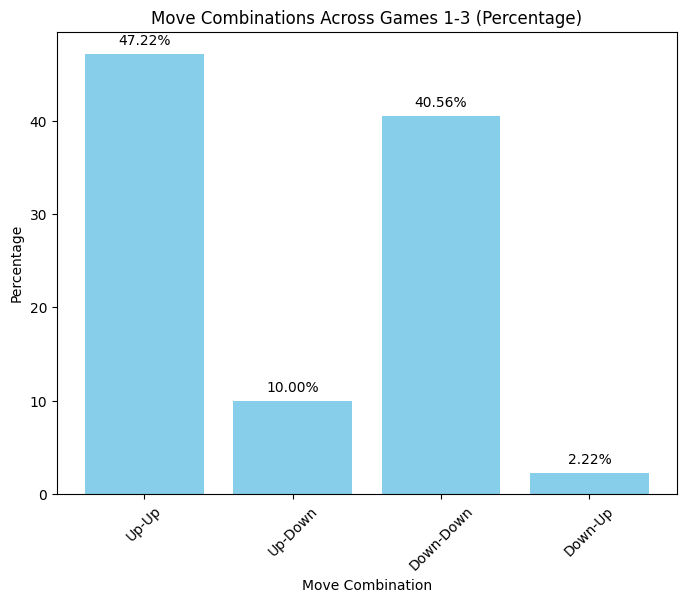

In [ ]:
import matplotlib.pyplot as plt

# Given move counts
move_counts = {'Up-Up': 85, 'Up-Down': 18, 'Down-Down': 73, 'Down-Up': 4}

# Calculate total moves to find percentages
total_moves = sum(move_counts.values())
percentages = {move: (count / total_moves) * 100 for move, count in move_counts.items()}

# Extract data for plotting
move_combinations = list(percentages.keys())
frequencies = list(percentages.values())

# Plotting the bar graph
plt.figure(figsize=(8, 6))
plt.bar(move_combinations, frequencies, color='skyblue')
plt.xlabel('Move Combination')
plt.ylabel('Percentage')
plt.title('Move Combinations Across Games 1-3 (Percentage)')
plt.xticks(rotation=45)

# Adding percentage labels on top of bars
for i, freq in enumerate(frequencies):
    plt.text(i, freq + 1, f"{freq:.2f}%", ha='center')

plt.show()


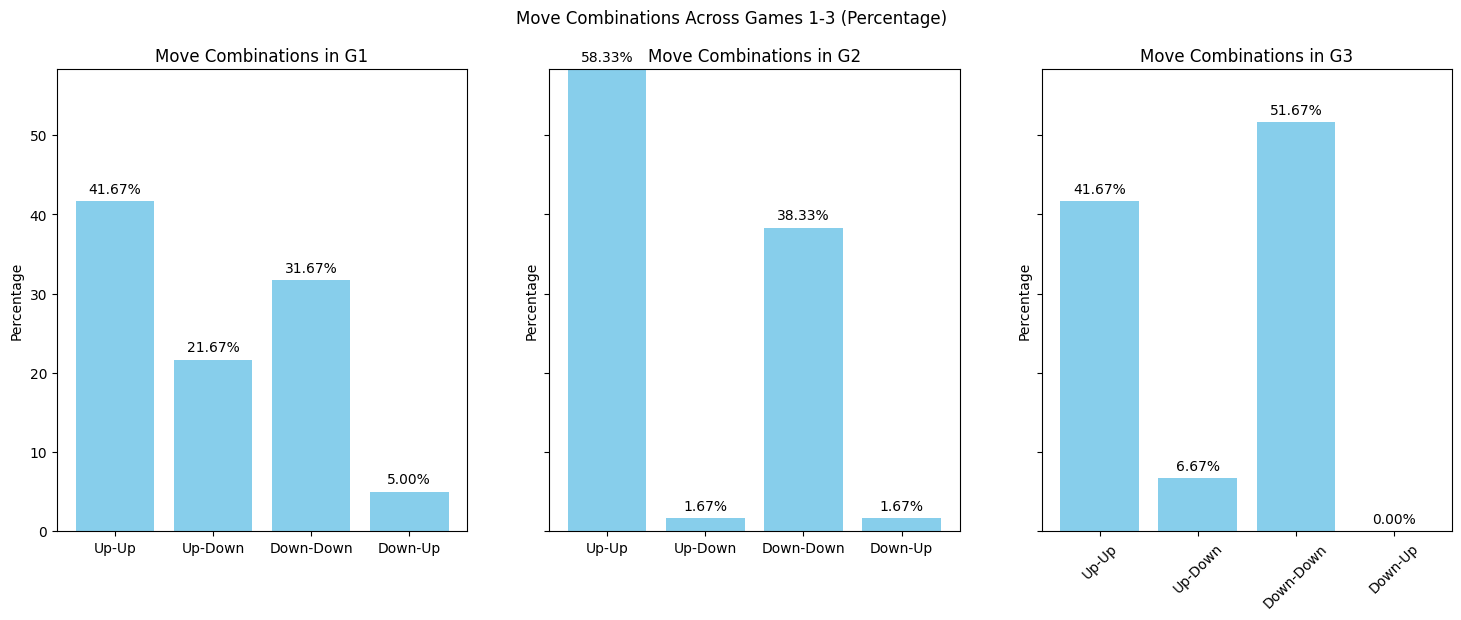

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `data` is your DataFrame and `partners_dict` is defined as above.

# Define round columns for each game
game_rounds = {
    'G1': [col for col in data.columns if 'G1' in col and 'Move' in col],
    'G2': [col for col in data.columns if 'G2' in col and 'Move' in col],
    'G3': [col for col in data.columns if 'G3' in col and 'Move' in col]
}

# Calculate move counts and percentages for each game
move_percentages = {}
for game, round_columns in game_rounds.items():
    move_counts = {'Up-Up': 0, 'Up-Down': 0, 'Down-Down': 0, 'Down-Up': 0}
    for player1, player2 in partners_dict.items():
        player1_moves = data[(data['Player'] == 'Player 1') & (data['Partner'] == player2)][round_columns]
        player2_moves = data[(data['Player'] == 'Player 2') & (data['Partner'] == player1)][round_columns]
        if not player1_moves.empty and not player2_moves.empty:
            for round_col in round_columns:
                p1_move = player1_moves[round_col].values[0] if not player1_moves[round_col].isna().all() else None
                p2_move = player2_moves[round_col].values[0] if not player2_moves[round_col].isna().all() else None
                if p1_move == 'Up' and p2_move == 'Up':
                    move_counts['Up-Up'] += 1
                elif p1_move == 'Up' and p2_move == 'Down':
                    move_counts['Up-Down'] += 1
                elif p1_move == 'Down' and p2_move == 'Down':
                    move_counts['Down-Down'] += 1
                elif p1_move == 'Down' and p2_move == 'Up':
                    move_counts['Down-Up'] += 1
    total_moves = sum(move_counts.values())
    percentages = {move: (count / total_moves) * 100 for move, count in move_counts.items()}
    move_percentages[game] = percentages

# Determine maximum y-axis limit across all games for consistent scaling
max_y = max(max(percentages.values()) for percentages in move_percentages.values())

# Plot the graphs for each game side by side
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle('Move Combinations Across Games 1-3 (Percentage)')

for i, (game, percentages) in enumerate(move_percentages.items()):
    axs[i].bar(percentages.keys(), percentages.values(), color='skyblue')
    axs[i].set_ylim(0, max_y)  # Set y-axis limit for consistent scale
    axs[i].set_title(f'Move Combinations in {game}')
    axs[i].set_ylabel('Percentage')
    for j, (move, freq) in enumerate(percentages.items()):
        axs[i].text(j, freq + 1, f"{freq:.2f}%", ha='center')

plt.xticks(rotation=45)
plt.show()
